# Comparaison of two policies

In this notebook, we give the possibilty to compare two policies

Given two trained policies, for each policy we will simulate a certain number of rounds against a random policy, and we check if one is significantly better than the other

## Imports

In [44]:
import statsmodels
import pandas as pd
import numpy as np
import scipy.stats as scs

import matplotlib.pyplot as plt

In [62]:
pwd

'/Users/ericpicot/PycharmProjects/gym-coinche/reward_prediction'

In [63]:
random_data = pd.read_csv("./data/random_hands_and_reward.csv").drop("Unnamed: 0", axis = 1)



In [68]:
random_data.shape
random_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '119', '120', '121', '122', '123', '124', '125', '126', '127', '128'],
      dtype='object', length=129)

In [75]:
random_data = pd.read_csv("./data/random_hands_and_reward.csv")

suit = ["atout", "na1", "na2", "na3"]
cards = ["7", "8", "9", "10", "jack", "queen", "king", "as"]
players = ["p1", "p2"]
random_data.columns = [(suit*2)[x//8]+"_"+cards[x%8]+"_"+players[x//32] for x in range(64)] + ["total_reward"]
random_attack = pd.read_csv("./data/random_attacker_teams.csv").drop("Unnamed: 0", axis = 1)

In [76]:
random_data.shape, random_attack.shape

((500, 129), (1000, 4))

In [77]:
random_data = random_data.merge(random_attack, right_index = True,
                               left_index = True)

random_data.head()

,atout_7_p1,atout_8_p1,atout_9_p1,atout_10_p1,atout_jack_p1,atout_queen_p1,atout_king_p1,atout_as_p1,na1_7_p1,na1_8_p1,...,na3_10_p4,na3_jack_p4,na3_queen_p4,na3_king_p4,na3_as_p4,total_reward,p0,p1,p2,p3
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,52.0,1,0,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,1,0,1,0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,32.0,0,1,0,1
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,79.0,0,1,0,1
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,102.0,0,1,0,1


## Sizing the test

In a first approach, we are making an A/B test. So we need to to have an estimation of the size of the samples that will be needed

count    1000.000000
mean       81.638000
std        35.339352
min         0.000000
25%        56.000000
50%        81.000000
75%       107.000000
max       162.000000
Name: total_reward, dtype: float64


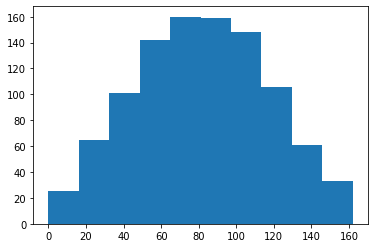

In [43]:
plt.hist(random_data["total_reward"])
print(random_data["total_reward"].describe())

In [54]:
# We want to be able to detect one point of difference of total reward for the attack, and one point for defense
mde = 1
risk1 = 0.05
risk2 = 0.2

# under a random policy, the distribution is centered in 82 with std of 35
std = 35

In [55]:
def size_sample_AB_test(risk1, risk2, var, mde, bilateral=False):

    if bilateral:
        Z_alpha = scs.norm(0, 1).ppf(1 - risk1/2)
    else:
        Z_alpha = scs.norm(0, 1).ppf(1 - risk1)

    Z_beta = scs.norm(0, 1).ppf(1 - risk2)

    min_N = (2*(var)*(Z_beta + Z_alpha)**2 / mde**2)

    return min_N

size_sample_AB_test(risk1, risk2, var = std**2, mde = mde, bilateral=True)

19229.755349155268

We will make the assumption that std is not really moving even with better policies.
Moreover, we'll take a bit bigger samples to be sure (as it doesn't cost anything to do so)

## Comparing policies

In [75]:
random_data = pd.read_csv("./data/competition_hands_and_reward.csv").drop("Unnamed: 0", axis = 1)

suit = ["atout", "na1", "na2", "na3"]
cards = ["7", "8", "9", "10", "jack", "queen", "king", "as"]
players = ["p1", "p2"]
players2 = ["p3", "p4"]
random_data.columns = [(suit*2)[x//8]+"_"+cards[x%8]+"_"+players[x//32] for x in range(64)] +
                        [(suit*2)[x//8]+"_"+cards[x%8]+"_"+players2[x//32] for x in range(64)]+
                        ["total_reward"]


#random_attack = pd.read_csv("./data/random_attacker_teams.csv").drop("Unnamed: 0", axis = 1)

In [56]:
data_1_path = "./data/policy_1_data.csv"
data_2_path = "./data/policy_2_data.csv"